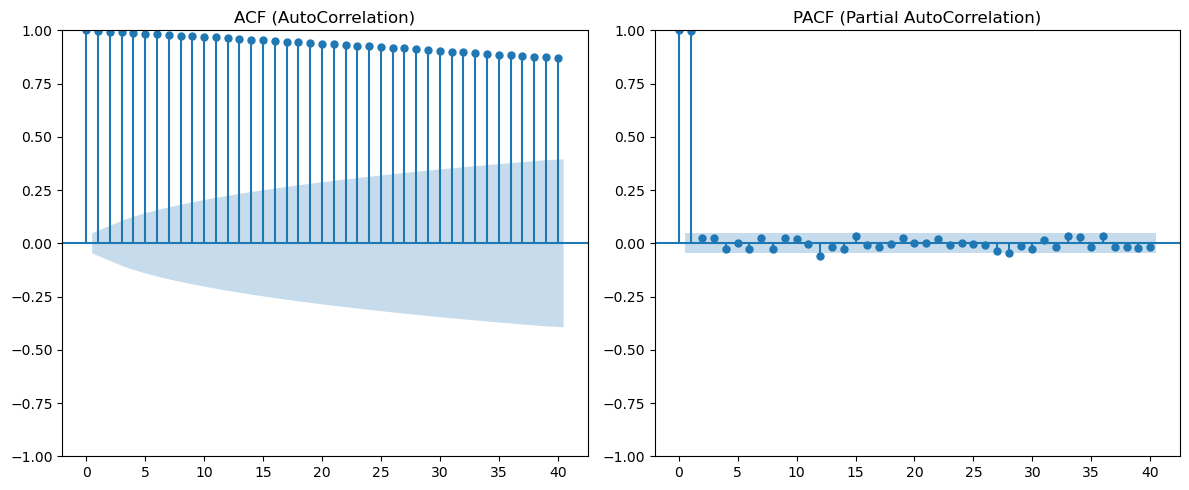

C:\Users\jaya karthick\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jaya karthick\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jaya karthick\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



📌 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1718
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2819.198
Date:                Sat, 12 Apr 2025   AIC                           5654.396
Time:                        12:06:14   BIC                           5697.982
Sample:                             0   HQIC                          5670.524
                               - 1718                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3127      0.498     -0.628      0.530      -1.289       0.664
ar.L2          0.5132      0.489      1.049      0.294      -0.446       1.472
ar.L3          0.0341      0

C:\Users\jaya karthick\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


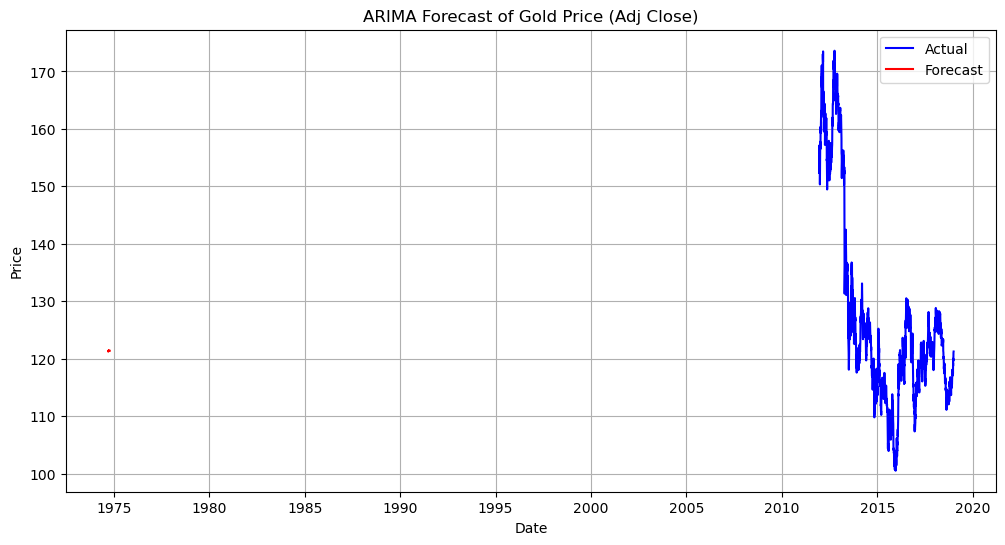

In [1]:
# === 1. Import Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# === 2. Load Data ===
file_path = r"D:/221501507/TIME SERIES ANALYSIS AND FORECASTING/EX06/archive (1) (1)/FINAL_USO.csv"
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")
df.columns = df.columns.str.strip()

# === 3. Use 'Adj Close' Column for Modeling ===
target_col = "Adj Close"
if target_col not in df.columns:
    raise ValueError(f"'{target_col}' column not found in dataset.")

ts = df[target_col].dropna()

# Optional: Resample if needed
# ts = ts.resample('M').mean()

# === 4. ACF & PACF for Parameter Identification ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(ts, ax=plt.gca(), lags=40)
plt.title("ACF (AutoCorrelation)")

plt.subplot(1, 2, 2)
plot_pacf(ts, ax=plt.gca(), lags=40)
plt.title("PACF (Partial AutoCorrelation)")
plt.tight_layout()
plt.show()

# === 5. Fit ARIMA Model (p,d,q) ===
# Try (5,1,2) or tune as needed
model = ARIMA(ts, order=(5, 1, 2))  # ARIMA(p,d,q)
model_fit = model.fit()

# === 6. Print Summary ===
print("\n📌 ARIMA Model Summary:")
print(model_fit.summary())

# === 7. Forecasting ===
forecast_steps = 30  # Days ahead
forecast = model_fit.forecast(steps=forecast_steps)

# === 8. Plot Actual vs Forecast ===
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast of Gold Price (Adj Close)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
